In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats

# 1 read file

In [2]:
df = pd.read_csv('./data/canoe_master.txt',header=None,sep='\s+',names=['user_id','order_time','quotity','amount'])
df

,user_id,order_time,quotity,amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


# 2 data wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     69659 non-null  int64  
 1   order_time  69659 non-null  int64  
 2   quotity     69659 non-null  int64  
 3   amount      69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
# time to datatime
# 1. int64 to str
df['order_time'] = df['order_time'].apply(lambda x:str(x))

In [5]:
# 2. change to datetime
df['order_time'] = pd.to_datetime(df['order_time'], format=('%Y-%m-%d'))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     69659 non-null  int64         
 1   order_time  69659 non-null  datetime64[ns]
 2   quotity     69659 non-null  int64         
 3   amount      69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [7]:
# describe
df.describe()

,user_id,quotity,amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


In [8]:
# remove all <=0 values
indexs = df[df['amount']<=0].index
df.drop(indexs)

,user_id,order_time,quotity,amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [9]:
# add a column for Month
df['month'] = df['order_time'].astype('datetime64[M]')

In [10]:
df.tail()

,user_id,order_time,quotity,amount,month
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01
69658,23570,1997-03-26,2,42.96,1997-03-01


# 3 EDA Explorer Data Analysis

## 3.1 Analysis based on 'Month'

In [11]:
# user spend total money by month
df.groupby(by='month')['amount'].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: amount, dtype: float64

Text(0.5, 1.0, 'Total amount by month')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


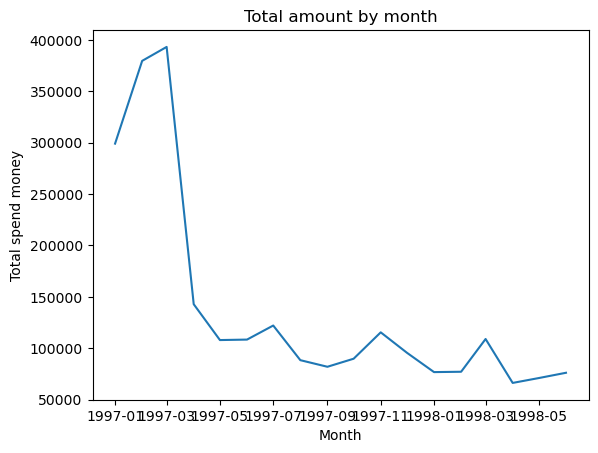

In [12]:
# plot a figure to show
plt.plot(df.groupby(by='month')['amount'].sum())
plt.xlabel('Month')
plt.ylabel("Total spend money")
plt.title("Total amount by month")

In [13]:
# total quotity by month
df.groupby(by='month')['quotity'].sum()

month
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: quotity, dtype: int64

<AxesSubplot:xlabel='month'>

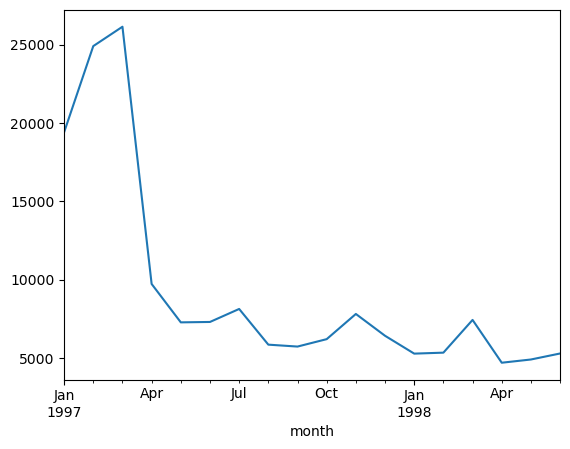

In [14]:
df.groupby(by='month')['quotity'].sum().plot()

In [15]:
# user spend times by month
df.groupby(by='month')['quotity'].count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: quotity, dtype: int64

<AxesSubplot:xlabel='month'>

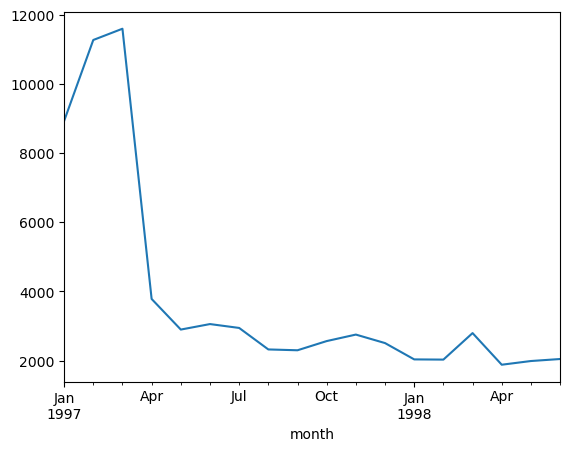

In [16]:
df.groupby(by='month')['quotity'].count().plot()

In [17]:
# 每月消费人数(remove duplicaged user_id in a month) nunique()
df.groupby(by='month')['user_id'].nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

## 3.2 用户个体消费数据分析

In [18]:
# 用户消费总额和总次数的统计描述
df.groupby(by='user_id')['quotity','amount'].sum()

/var/folders/rz/6rwl1std7dz1npfq_pm66bfr0000gn/T/ipykernel_76260/2919126084.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='user_id')['quotity','amount'].sum()


,quotity,amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61
...,...,...
23566,2,36.00
23567,1,20.97
23568,6,121.70


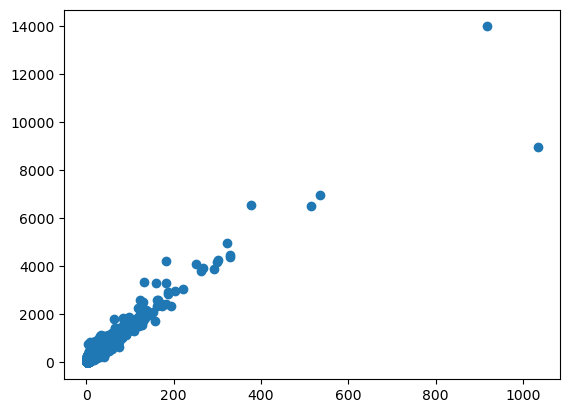

In [19]:
# 用户消费金额和消费产品数量的散点图
user_quotity_sum = df.groupby(by='user_id')['quotity'].sum()
user_amount_sum = df.groupby(by='user_id')['amount'].sum()
plt.scatter(user_quotity_sum, user_amount_sum)

(array([17328.,  3234.,  1260.,   664.,   350.,   195.,   140.,    89.,
           62.,    48.]),
 array([  0.   ,  99.969, 199.938, 299.907, 399.876, 499.845, 599.814,
        699.783, 799.752, 899.721, 999.69 ]),
 <BarContainer object of 10 artists>)

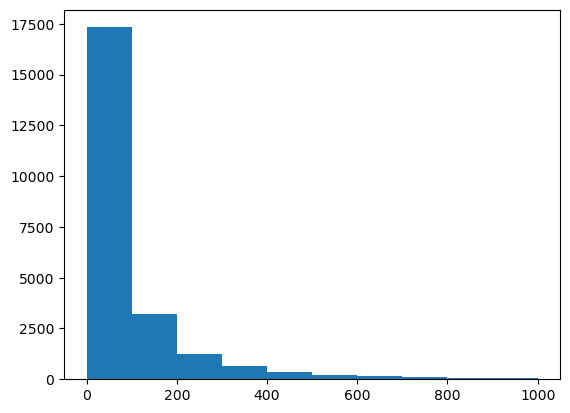

In [20]:
# 用户消费总金额的hist分布图 （消费金额在1000以内的分布）
plt.hist(user_amount_sum[user_amount_sum <= 1000])

(array([19543.,  2330.,   830.,   328.,   185.,   116.,    57.,    42.,
           39.,    21.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <BarContainer object of 10 artists>)

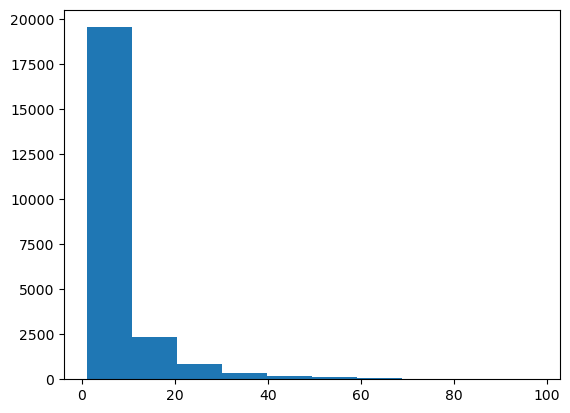

In [21]:
# 用户消费总数量的hist分布图 （消费次数在100以内的分布）
user_quotity_sum = df.groupby(by='user_id')['quotity'].sum()
plt.hist(user_quotity_sum[user_quotity_sum <= 100])

# 3.3 用户消费行为分析

In [22]:
# 用户第一次消费的月份分布，和人数统计

In [23]:
# the first users
df_first = df.drop_duplicates(subset=['user_id'],keep='first')
# groupby month
df_first.groupby(by=['month'])['user_id'].count()

month
1997-01-01    7846
1997-02-01    8476
1997-03-01    7248
Name: user_id, dtype: int64

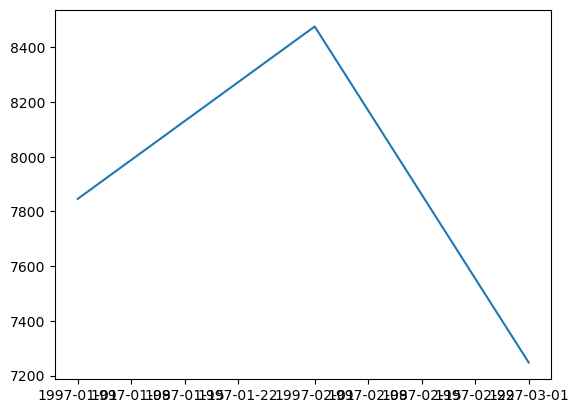

In [24]:
# plot for month
plt.plot(df_first.groupby(by=['month'])['user_id'].count())

In [25]:
# the first customer number
df_first['user_id'].count()

23570

In [26]:
# 用户最后一次消费的时间分布，和人数统计
df_last = df.drop_duplicates(subset=['user_id'],keep='last')
# 

In [27]:
# users number
# df.groupby(by='user_id')['month'].max().value_counts().sum()
df_last['user_id'].count()

23570

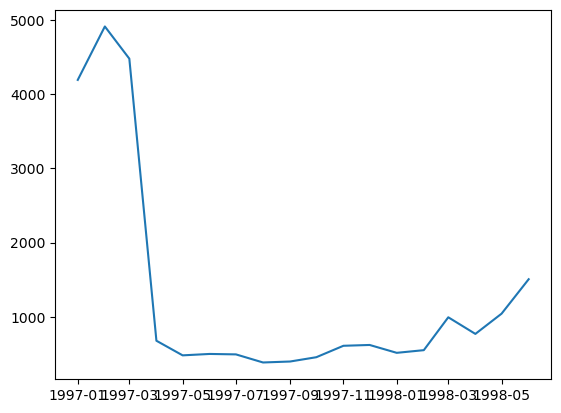

In [28]:
# 最后一次消费的时间分布
# df.groupby(by='user_id')['month'].max().value_counts()
plt.plot(df.groupby(by='user_id')['month'].max().value_counts().sort_index())

In [29]:
# 新老用户比
# 消费一次为新用户，2次及以上为老用户

# 对分组后的结果，进行多个指定聚合处理，得出一个新df
new_df = df.groupby(by='user_id')['order_time'].agg(['min','max'])

In [30]:
# new - True, old - False
(new_df['min'] == new_df['max']).value_counts()

True     12054
False    11516
dtype: int64

# 用户分层

## 分层方法：总购买量，总消费金额，最近一次消费时间 RFM
## RFM模型设计：
### R：最近消费时间的间隔。 F：购买总数，F越大，客户活跃度大。M：交易金额，M越大，客户价值越高。
### RFM：重要价值客户/重要保持客户/重要挽留客户/重要发展客户
###            一般价值客户/一般保持客户/一般挽留客户/一般发展客户

In [31]:
# 总购买量，总消费金额，最近一次消费时间 RFM
rfm = df.pivot_table(index='user_id',aggfunc={'quotity':'sum','amount':'sum','order_time':'max'})
rfm

,amount,order_time,quotity
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29
...,...,...,...
23566,36.00,1997-03-25,2
23567,20.97,1997-03-25,1
23568,121.70,1997-04-22,6


In [32]:
# R：最近消费时间的间隔。 F：购买总数，F越大，客户活跃度大。M：交易金额，M越大，客户价值越高。

# R, 最近一次购买时间。用当前时间减去最近购买，得到天数。
max_date = df['order_time'].max()  # 这个时间，假设是当前时间
# 用户最近一次购买时间
rfm['R'] = (max_date - df.groupby(by='user_id')['order_time'].max())
# 把R的天数，变更为float
rfm['R'] = rfm['R'] / np.timedelta64(1,'D')

In [33]:
rfm.drop(labels='order_time',axis=1,inplace=True)
rfm.head()

,amount,quotity,R
user_id,,,
1,11.77,1,545.0
2,89.00,6,534.0
3,156.46,16,33.0
4,100.50,7,200.0
5,385.61,29,178.0


In [34]:
# F：购买总数，F越大，客户活跃度大。M：交易金额，M越大，客户价值越高。
rfm.columns = ['M','F','R']

In [35]:
rfm.head()

,M,F,R
user_id,,,
1,11.77,1,545.0
2,89.00,6,534.0
3,156.46,16,33.0
4,100.50,7,200.0
5,385.61,29,178.0


In [36]:
# RFM
def rfm_func(x):
    level = x.map(lambda x: '1' if x>=0 else '0')
    label = level.R + level.F + level.M
    dct = {
        '111': '重要价值客户',
        '011': '重要保持客户',
        '101': '重要挽留客户',
        '001': '重要发展客户',
        '110': '一般价值客户',
        '010': '一般保持客户',
        '100': '一般挽留客户',
        '000': '一般发展客户'
    }
    result = dct[label]
    return result

rfm['label'] = rfm.apply(lambda x: x-x.mean()).apply(rfm_func, axis=1)

In [37]:
rfm

,M,F,R,label
user_id,,,,
1,11.77,1,545.0,一般挽留客户
2,89.00,6,534.0,一般挽留客户
3,156.46,16,33.0,重要保持客户
4,100.50,7,200.0,一般发展客户
5,385.61,29,178.0,重要保持客户
...,...,...,...,...
23566,36.00,2,462.0,一般挽留客户
23567,20.97,1,462.0,一般挽留客户
23568,121.70,6,434.0,重要挽留客户


In [38]:
rfm[['R-M','F-M','M-M']] = rfm[['R','F','M']].apply(lambda x: x - x.mean())

In [39]:
rfm

,M,F,R,label,R-M,F-M,M-M
user_id,,,,,,,
1,11.77,1,545.0,一般挽留客户,177.778362,-6.122656,-94.310426
2,89.00,6,534.0,一般挽留客户,166.778362,-1.122656,-17.080426
3,156.46,16,33.0,重要保持客户,-334.221638,8.877344,50.379574
4,100.50,7,200.0,一般发展客户,-167.221638,-0.122656,-5.580426
5,385.61,29,178.0,重要保持客户,-189.221638,21.877344,279.529574
...,...,...,...,...,...,...,...
23566,36.00,2,462.0,一般挽留客户,94.778362,-5.122656,-70.080426
23567,20.97,1,462.0,一般挽留客户,94.778362,-6.122656,-85.110426
23568,121.70,6,434.0,重要挽留客户,66.778362,-1.122656,15.619574


# 用户活跃度分析
## 将用户划分为：活跃用户和其他用户
### 统计每个用户每个月的消费次数
### 统计每个用户每个月是否消费，1 或 0
#### DataFrame  apply（返回series）/applymap（返回df）
### 将用户按照每个月份分成： 
#### unreg： 观望用户（前面2个月没买，第3个月第一次买，则用户前2个月为观望用户）
#### unactive：首月购买后，后续没有购买，则后续月份为unactive
#### new：当前月就进行首次购买的用户，在当前月为new
#### active：连续月份购买的用户在这些月为active
#### return：购买之后间隔n月，再次购买的，购买当月份该用户为return

In [40]:
# 统计每个用户每个月的消费次数

user_month_count = df.pivot_table(index='user_id',values='order_time',aggfunc='count',columns='month').fillna(value=0)
user_month_count

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# 统计每个用户每个月是否消费，1 或 0
user_month = user_month_count.applymap(lambda x: 1 if x>=1 else 0)
user_month

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# 把user_month的1，0表，對應
# unreg： 观望用户（前面2个月没买，第3个月第一次买，则用户前2个月为观望用户）
# unactive：首月购买后，后续没有购买，则后续月份为unactive
# new：当前月就进行首次购买的用户，在当前月为new
# active：连续月份购买的用户在这些月为active
# return：购买之后间隔n月，再次购买的，购买当月份该用户为return
columns = user_month.shape[1]
def active_status(data):
    status = [] # 某个用户每一个月的活跃度
    for i in range(columns):
        # 若本月没有消费
        if data.iloc[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        # 本月有消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

pivoted_status = user_month.apply(active_status, axis=1)
pivoted_status.head()

user_id
1    [new, unactive, unactive, unactive, unactive, ...
2    [new, unactive, unactive, unactive, unactive, ...
3    [new, unactive, return, active, unactive, unac...
4    [new, unactive, unactive, unactive, unactive, ...
5    [new, active, unactive, return, active, active...
dtype: object

In [47]:
# 把pivoted_status，寫入user_month中
dd = pivoted_status.values.tolist()
df_new = pd.DataFrame(data=dd,index=user_month.index,columns=user_month.columns)
df_new

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [48]:
# 每月活跃用户统计
purchase_status_ct = df_new.apply(lambda x: pd.value_counts(x)).fillna(0)
purchase_status_ct

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,0.0,1157.0,1681.0,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595.0,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,0.0,6689.0,14046.0,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0
unreg,15724.0,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
purchase_status_ct.T

,active,new,return,unactive,unreg
month,,,,,
1997-01-01,0.0,7846.0,0.0,0.0,15724.0
1997-02-01,1157.0,8476.0,0.0,6689.0,7248.0
1997-03-01,1681.0,7248.0,595.0,14046.0,0.0
1997-04-01,1773.0,0.0,1049.0,20748.0,0.0
1997-05-01,852.0,0.0,1362.0,21356.0,0.0
1997-06-01,747.0,0.0,1592.0,21231.0,0.0
1997-07-01,746.0,0.0,1434.0,21390.0,0.0
1997-08-01,604.0,0.0,1168.0,21798.0,0.0
1997-09-01,528.0,0.0,1211.0,21831.0,0.0
